In [129]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [211]:
from pymongo import MongoClient as mc
import datetime as dt
from numpy import dot
from numpy.linalg import norm
from scipy.spatial import distance
import pandas as pd
import random
from src.objects import *
from functools import reduce
pd.set_option('display.max_row', 500)

class KETIDB:
    def __init__(self):
        self.mongo_uri = "mongodb://localhost:27017"

    def connect(self):
        print("connect KETIDB,,,")
        self.client = mc(self.mongo_uri)
        self.keti_pr_db = self.client.keti_pattern_recognition
        self.household_col = self.keti_pr_db.household_info
        self.uid_check = []
        print("connect success!!")

    def close(self):
        print("disconnect KETIDB,,,")
        self.client.close()
        self.uid_check = []
        print("disconnect success!!")

    def find(self):
        return self.household_col.find({})

In [148]:
DB = KETIDB()
DB.connect()

connect KETIDB,,,
connect success!!


# 전력 (kW), 전력량 (kWh)
- 전력 (kW): 어느 한 순간 전력 계통에 접속된 부하설비에서 소모되는 전체전력을 나타내는 것으로[W]또는[kW]로 나타낸다.
- 전력량 (kWh): 일정기간동안 사용된 전력의 양을 나타내는 것으로[Wh]또는[kWh]로 나타낸다.

In [149]:
db_cursor = DB.find()
datas = list()
for _ in db_cursor:
    datas.append(_)

In [150]:
# 계획
# 1. 계산속도를 위해서 pandas 파일로 내가 가지고 있기
# 2. 달마다 피크정보와 세대 정보를 mgmtoffice 클래스로 넘겨주는 걸로 하자

In [152]:
datas_df = pd.DataFrame()

for _ in datas:
    uid = _['uid']
    powers = [ _['power'] for _ in _['timeslot'] ] 
    
    datas_df[uid] = powers
    
datas_df.index = [ dt.datetime.strptime(_['time'], "%Y-%m-%d T%H:%M Z") for _ in datas[0]['timeslot'] ]
datas_df

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트4-105-102,아파트4-103-1102,아파트4-105-601,아파트4-104-1501,아파트4-103-702,아파트4-102-104,아파트4-103-902,아파트4-101-602,아파트4-103-905,아파트4-101-104
2018-05-01 00:00:00,0.085,0.016,0.052,0.003,0.032,0.074,0.053,0.096,0.105,0.042,...,0.182,0.044,0.051,0.057,0.126,0.094,0.065,0.116,0.093,0.147
2018-05-01 00:15:00,0.086,0.049,0.053,0.002,0.022,0.014,0.048,0.090,0.108,0.022,...,0.117,0.060,0.036,0.055,0.116,0.089,0.083,0.113,0.105,0.130
2018-05-01 00:30:00,0.085,0.013,0.073,0.002,0.016,0.051,0.029,0.033,0.097,0.046,...,0.147,0.053,0.075,0.032,0.131,0.055,0.084,0.153,0.119,0.104
2018-05-01 00:45:00,0.085,0.043,0.067,0.002,0.015,0.015,0.031,0.092,0.048,0.067,...,0.152,0.047,0.064,0.022,0.104,0.057,0.087,0.149,0.102,0.093
2018-05-01 01:00:00,0.084,0.033,0.051,0.003,0.022,0.052,0.052,0.030,0.041,0.045,...,0.110,0.042,0.036,0.035,0.104,0.062,0.087,0.130,0.083,0.093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-30 22:45:00,0.007,0.027,0.011,0.066,0.014,0.066,0.066,0.080,0.016,0.058,...,0.119,0.087,0.029,0.098,0.075,0.023,0.238,0.363,0.057,0.132
2019-04-30 23:00:00,0.006,0.022,0.014,0.063,0.030,0.061,0.063,0.215,0.033,0.033,...,0.148,0.089,0.070,0.090,0.086,0.026,0.242,0.354,0.078,0.122
2019-04-30 23:15:00,0.015,0.024,0.009,0.062,0.030,0.064,0.060,0.164,0.051,0.035,...,0.112,0.070,0.039,0.098,0.113,0.037,0.193,0.309,0.041,0.121
2019-04-30 23:30:00,0.023,0.023,0.016,0.063,0.029,0.063,0.038,0.132,0.046,0.081,...,0.147,0.084,0.044,0.099,0.071,0.050,0.156,0.259,0.070,0.106


In [155]:
datelist = list()
merge_df = pd.DataFrame()

for idx in range(0, len(datas_df), 4):
    if (idx % 1000) == 0:
        print(idx)
    datelist.append(datas_df.iloc[idx].name)
    in_df = datas_df.iloc[idx: idx+4].sum().copy()
    merge_df = merge_df.append(
        pd.Series(in_df, name=datas_df.iloc[idx].name)
    )

merge_df

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000


,아파트1-101-1002,아파트1-101-104,아파트1-101-1102,아파트1-101-1202,아파트1-101-1302,아파트1-101-1401,아파트1-101-1403,아파트1-101-1502,아파트1-101-1504,아파트1-101-1602,...,아파트4-104-101,아파트4-104-1301,아파트4-104-1501,아파트4-104-301,아파트4-105-102,아파트4-105-103,아파트4-105-1102,아파트4-105-1104,아파트4-105-601,아파트4-105-803
2018-05-01 00:00:00,0.339,0.356,0.555,0.364,0.661,0.202,0.517,0.099,0.400,0.431,...,0.314,0.302,0.166,0.097,0.598,0.246,0.346,0.311,0.226,0.351
2018-05-01 01:00:00,0.294,0.362,0.289,0.315,0.556,0.204,0.463,0.107,0.336,0.178,...,0.302,0.250,0.135,0.093,0.505,0.326,0.307,0.297,0.186,0.277
2018-05-01 02:00:00,0.238,0.318,0.220,0.228,0.671,0.209,0.472,0.091,0.305,0.205,...,0.301,0.294,0.121,0.081,0.532,0.254,0.287,0.344,0.187,0.141
2018-05-01 03:00:00,0.246,0.277,0.221,0.351,0.514,0.207,0.471,0.106,0.374,0.198,...,0.294,0.236,0.116,0.085,0.430,0.258,0.296,0.421,0.218,0.302
2018-05-01 04:00:00,0.236,0.257,0.210,0.303,0.262,0.203,0.503,0.098,0.404,0.204,...,0.297,0.306,0.322,0.078,0.274,0.236,0.354,0.400,0.216,0.315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-30 19:00:00,0.210,0.548,0.202,0.558,1.133,0.227,0.570,0.476,1.136,0.426,...,0.486,1.381,0.086,0.236,0.472,2.768,0.458,0.607,0.133,0.272
2019-04-30 20:00:00,0.470,0.571,0.187,0.351,0.874,0.257,0.772,0.431,1.101,0.516,...,0.643,0.908,0.102,0.147,0.405,0.550,0.526,0.647,0.162,0.284
2019-04-30 21:00:00,0.526,0.628,0.291,0.286,0.999,0.292,0.543,0.467,1.053,0.561,...,0.698,0.473,0.154,0.408,0.460,0.679,0.305,0.544,0.219,0.315
2019-04-30 22:00:00,0.638,0.340,0.330,0.342,0.941,0.325,0.675,0.427,0.626,0.549,...,0.395,0.541,0.537,0.366,0.383,0.652,0.280,0.512,0.202,0.303


In [156]:
# set peak
peak_year = 2021
peak_month = [_ for _ in range(1, 13)]
peak_df = pd.DataFrame(columns=['peak (kW)'])
peak_date = list()

for m in peak_month:
    peak = round((datas_df.loc[datas_df.index.month == m] * 4).sum(axis=1).max())
    peak_date.append(
        dt.datetime(
            peak_year,
            m,
            1
        )
    )
    peak_df = peak_df.append(
        {
            "peak (kW)": peak,
        }, ignore_index=True)
    
peak_df.index = peak_date
peak_df

,peak (kW)
2021-01-01,222
2021-02-01,222
2021-03-01,211
2021-04-01,209
2021-05-01,154
2021-06-01,201
2021-07-01,357
2021-08-01,354
2021-09-01,202
2021-10-01,194


In [157]:
# set household kwh
now_month = 2

sum_df = pd.DataFrame(merge_df.loc[merge_df.index.month == now_month].sum()).T.copy()

sum_df.index = ['kwh']
sum_df = round(sum_df)
sum_df

,아파트1-101-1002,아파트1-101-104,아파트1-101-1102,아파트1-101-1202,아파트1-101-1302,아파트1-101-1401,아파트1-101-1403,아파트1-101-1502,아파트1-101-1504,아파트1-101-1602,...,아파트4-104-101,아파트4-104-1301,아파트4-104-1501,아파트4-104-301,아파트4-105-102,아파트4-105-103,아파트4-105-1102,아파트4-105-1104,아파트4-105-601,아파트4-105-803
kwh,251.0,481.0,177.0,218.0,397.0,297.0,339.0,197.0,348.0,288.0,...,309.0,339.0,146.0,184.0,267.0,344.0,208.0,236.0,167.0,150.0


In [200]:
# calc
rate_type = "종합계약"
rate_table = COMPREHENSIVE_HOUSEHOLD_RATE_TABLE if rate_type == "종합계약" else SINGLE_RATE_TABLE
households = list()

for col in sum_df:
    households.append(
        HOUSEHOLD(
            name=col,
            kwh=sum_df[col]['kwh'],
            rate_table=rate_table
        )
    )
    
PUBLIC_METER = 50000
exam_apt_meter = sum_df.sum(axis=1)['kwh'] + PUBLIC_METER
    
mgmt = MGMTOFFICE(rate_type=rate_type, 
                  APT_METER=exam_apt_meter, 
                  now_month=now_month,
                  households=households,
                  peak_df=peak_df)

In [239]:
bill = mgmt.bill()

,사용량 (kwh),기본요금,전력량요금,기후환경요금,연료비조정액,필수사용량보장공제,전기요금계,부가세,4사 5입,전력산업기반기금,전력산업기반기금 (절사),청구금액,청구금액 (절사),공동전기사용료,최종청구금액
아파트1-104-1307,18.0,730.0,1319.0,95.0,-54.0,-2500.0,-410.0,-41.0,-41.0,-15.17,-20.0,-471.0,-480.0,20107,19627.0


In [220]:
# calc
rate_type = "단일계약"

    
mgmt = MGMTOFFICE(rate_type=rate_type, 
                  APT_METER=exam_apt_meter, 
                  now_month=now_month,
                  households=households,
                  peak_df=peak_df)

In [266]:
mgmt_office = pd.DataFrame(columns=[
    'APT METER',
    'HOUSEHOLD METER',
    'PUBLIC METER',
    'PUBLIC PERCENTAGE',
    '종합계약 청구서',
    '단일계약 청구서',
    '종합계약 (최종청구 min)',
    '단일계약 (최종청구 min)',
    '종합계약 (최종청구 max)',
    '단일계약 (최종청구 max)',
])


HOUSEHOLD_METER = sum_df.sum(axis=1)['kwh']
PUBLIC_METER = 10000
APT_METER = HOUSEHOLD_METER + PUBLIC_METER
MGMT_ROW_NAME = "[2월] 관리사무소 청구서"
PUBLIC_PERCENTAGE = round((PUBLIC_METER) / APT_METER * 100)

# init
while PUBLIC_PERCENTAGE <= 80 :
    mgmt_dict = dict()
    
    mgmt_dict['APT METER'] = APT_METER
    mgmt_dict['HOUSEHOLD METER'] = HOUSEHOLD_METER
    mgmt_dict['PUBLIC METER'] = PUBLIC_METER
    mgmt_dict['PUBLIC PERCENTAGE'] = PUBLIC_PERCENTAGE
    
    comprehensive_households = list()
    single_households = list()
    for col in sum_df:
        comprehensive_households.append(
            HOUSEHOLD(
                name=col,
                kwh=sum_df[col]['kwh'],
                rate_table=COMPREHENSIVE_HOUSEHOLD_RATE_TABLE
            )
        )
        
        single_households.append(
            HOUSEHOLD(
                name=col,
                kwh=sum_df[col]['kwh'],
                rate_table=SINGLE_RATE_TABLE
            )
        )
    
    comprehensive_mgmt = MGMTOFFICE(rate_type="종합계약", 
                  APT_METER=APT_METER,
                  now_month=now_month,
                  households=comprehensive_households,
                  peak_df=peak_df)
    single_mgmt = MGMTOFFICE(rate_type=rate_type, 
                  APT_METER=APT_METER, 
                  now_month=now_month,
                  households=single_households,
                  peak_df=peak_df)
    mgmt_dict['종합계약 청구서'] = comprehensive_mgmt.bill().loc[MGMT_ROW_NAME]['청구금액 (절사)']
    mgmt_dict['단일계약 청구서'] = single_mgmt.bill().loc[MGMT_ROW_NAME]['청구금액 (절사)']
    mgmt_dict['종합계약 (최종청구 min)'] = comprehensive_mgmt.bill().loc[sum_df.columns.values]['최종청구금액'].min()
    mgmt_dict['단일계약 (최종청구 min)'] = single_mgmt.bill().loc[sum_df.columns.values]['최종청구금액'].min()
    mgmt_dict['종합계약 (최종청구 max)'] = comprehensive_mgmt.bill().loc[sum_df.columns.values]['최종청구금액'].max()
    mgmt_dict['단일계약 (최종청구 max)'] = single_mgmt.bill().loc[sum_df.columns.values]['최종청구금액'].max()
    
    mgmt_office = mgmt_office.append(
        pd.Series(mgmt_dict, name="{}%".format(PUBLIC_PERCENTAGE))
    )
    
    APT_METER += 5000
    PUBLIC_METER = APT_METER - HOUSEHOLD_METER
    PUBLIC_PERCENTAGE = round((PUBLIC_METER) / APT_METER * 100)
    
    print("next percentage: {}, next public meter: {}, next apt meter: {}".format(
        PUBLIC_PERCENTAGE, PUBLIC_METER, APT_METER
    ))

next percentage: 13, next public meter: 15000.0, next apt meter: 115904.0
next percentage: 17, next public meter: 20000.0, next apt meter: 120904.0
next percentage: 20, next public meter: 25000.0, next apt meter: 125904.0
next percentage: 23, next public meter: 30000.0, next apt meter: 130904.0
next percentage: 26, next public meter: 35000.0, next apt meter: 135904.0
next percentage: 28, next public meter: 40000.0, next apt meter: 140904.0
next percentage: 31, next public meter: 45000.0, next apt meter: 145904.0
next percentage: 33, next public meter: 50000.0, next apt meter: 150904.0
next percentage: 35, next public meter: 55000.0, next apt meter: 155904.0
next percentage: 37, next public meter: 60000.0, next apt meter: 160904.0
next percentage: 39, next public meter: 65000.0, next apt meter: 165904.0
next percentage: 41, next public meter: 70000.0, next apt meter: 170904.0
next percentage: 43, next public meter: 75000.0, next apt meter: 175904.0
next percentage: 44, next public meter

In [267]:
mgmt_office

,APT METER,HOUSEHOLD METER,PUBLIC METER,PUBLIC PERCENTAGE,종합계약 청구서,단일계약 청구서,종합계약 (최종청구 min),단일계약 (최종청구 min),종합계약 (최종청구 max),단일계약 (최종청구 max)
9%,110904.0,100904.0,10000.0,9.0,14997600.0,12516810.0,1818.0,3023.0,153808.0,121223.0
13%,115904.0,100904.0,15000.0,13.0,15672200.0,13367060.0,3513.0,5160.0,155503.0,123360.0
17%,120904.0,100904.0,20000.0,17.0,16335960.0,14152610.0,5181.0,7133.0,157171.0,125333.0
20%,125904.0,100904.0,25000.0,20.0,16990170.0,15002850.0,6824.0,9270.0,158814.0,127470.0
23%,130904.0,100904.0,30000.0,23.0,17635910.0,15788840.0,8447.0,11245.0,160437.0,129445.0
26%,135904.0,100904.0,35000.0,26.0,18274140.0,16639090.0,10050.0,13381.0,162040.0,131581.0
28%,140904.0,100904.0,40000.0,28.0,18905640.0,17489340.0,11637.0,15517.0,163627.0,133717.0
31%,145904.0,100904.0,45000.0,31.0,19531110.0,18274870.0,13209.0,17491.0,165199.0,135691.0
33%,150904.0,100904.0,50000.0,33.0,20151140.0,19125120.0,14766.0,19627.0,166756.0,137827.0
35%,155904.0,100904.0,55000.0,35.0,20766270.0,19911110.0,16312.0,21602.0,168302.0,139802.0


In [268]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 15.7, 13.27
plt.rcParams['font.family'] = 'AppleGothic'

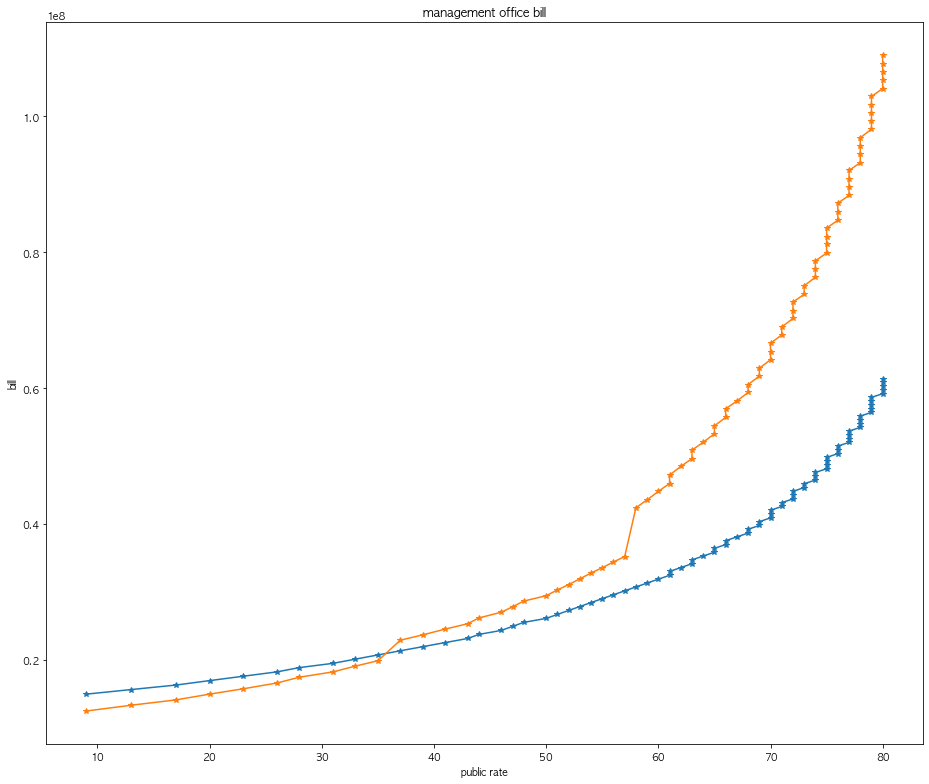

In [269]:
plt.plot(mgmt_office['PUBLIC PERCENTAGE'].values,
        mgmt_office['종합계약 청구서'].values, marker="*")
plt.plot(mgmt_office['PUBLIC PERCENTAGE'].values,
        mgmt_office['단일계약 청구서'].values, marker="*")
plt.title("management office bill")
plt.xlabel("public rate")
plt.ylabel("bill")
plt.show()

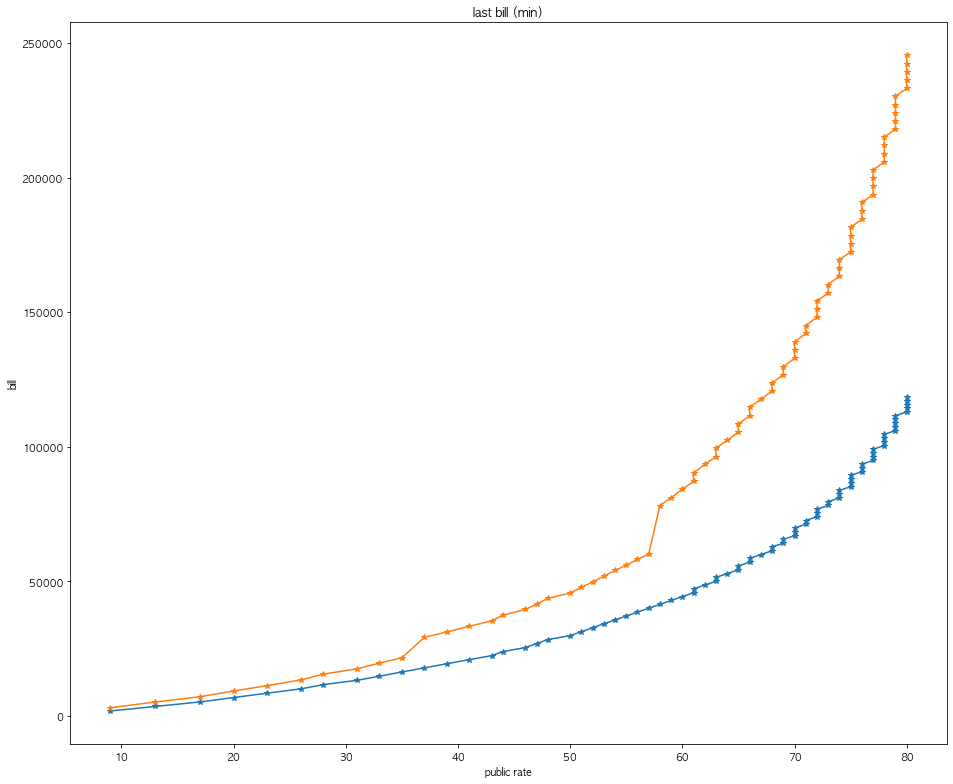

In [270]:
plt.plot(mgmt_office['PUBLIC PERCENTAGE'].values,
        mgmt_office['종합계약 (최종청구 min)'].values, marker="*")
plt.plot(mgmt_office['PUBLIC PERCENTAGE'].values,
        mgmt_office['단일계약 (최종청구 min)'].values, marker="*")
plt.title("last bill (min)")
plt.xlabel("public rate")
plt.ylabel("bill")
plt.show()

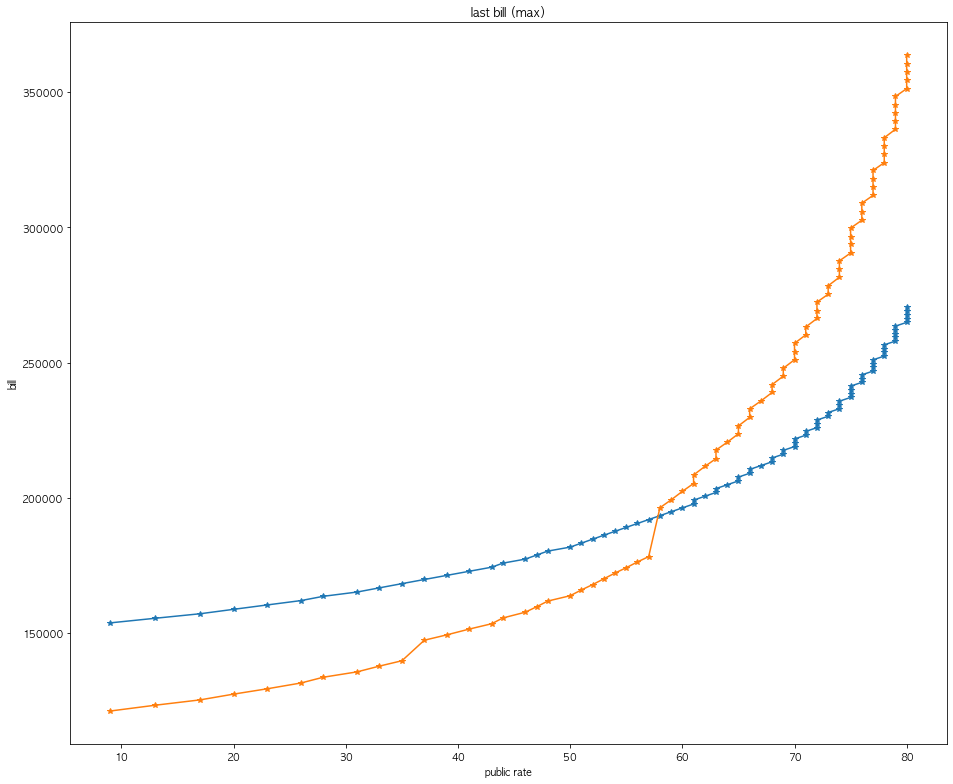

In [271]:
plt.plot(mgmt_office['PUBLIC PERCENTAGE'].values,
        mgmt_office['종합계약 (최종청구 max)'].values, marker="*")
plt.plot(mgmt_office['PUBLIC PERCENTAGE'].values,
        mgmt_office['단일계약 (최종청구 max)'].values, marker="*")
plt.title("last bill (max)")
plt.xlabel("public rate")
plt.ylabel("bill")
plt.show()